In [1]:
import torch
import numpy as np
from datasets import load_dataset
from transformers import (
    AutoImageProcessor,
    AutoModelForImageClassification,
    TrainingArguments,
    Trainer
)
from torchvision.transforms import (
    RandomResizedCrop,
    Compose,
    Normalize,
    ToTensor,
    RandomHorizontalFlip
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [3]:
model_path = './vit_finetuned_food101_final'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = AutoModelForImageClassification.from_pretrained(model_path).to(device)
checkpoint = 'google/vit-base-patch16-224'
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [5]:
import requests
from PIL import Image
from io import BytesIO

In [10]:
# imag_path = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Apple_pie.jpg/800px-Apple_pie.jpg'
# response = requests.get(imag_path)
# response

<Response [403]>

In [26]:
local_img_path = '/workspace/IMG_2431-SQ-W.jpg'
image = Image.open(local_img_path)
image = image.convert('RGB')
inputs =  image_processor(image,return_tensors='pt')
inputs = {k : v.to(device) for k,v in inputs.items()}

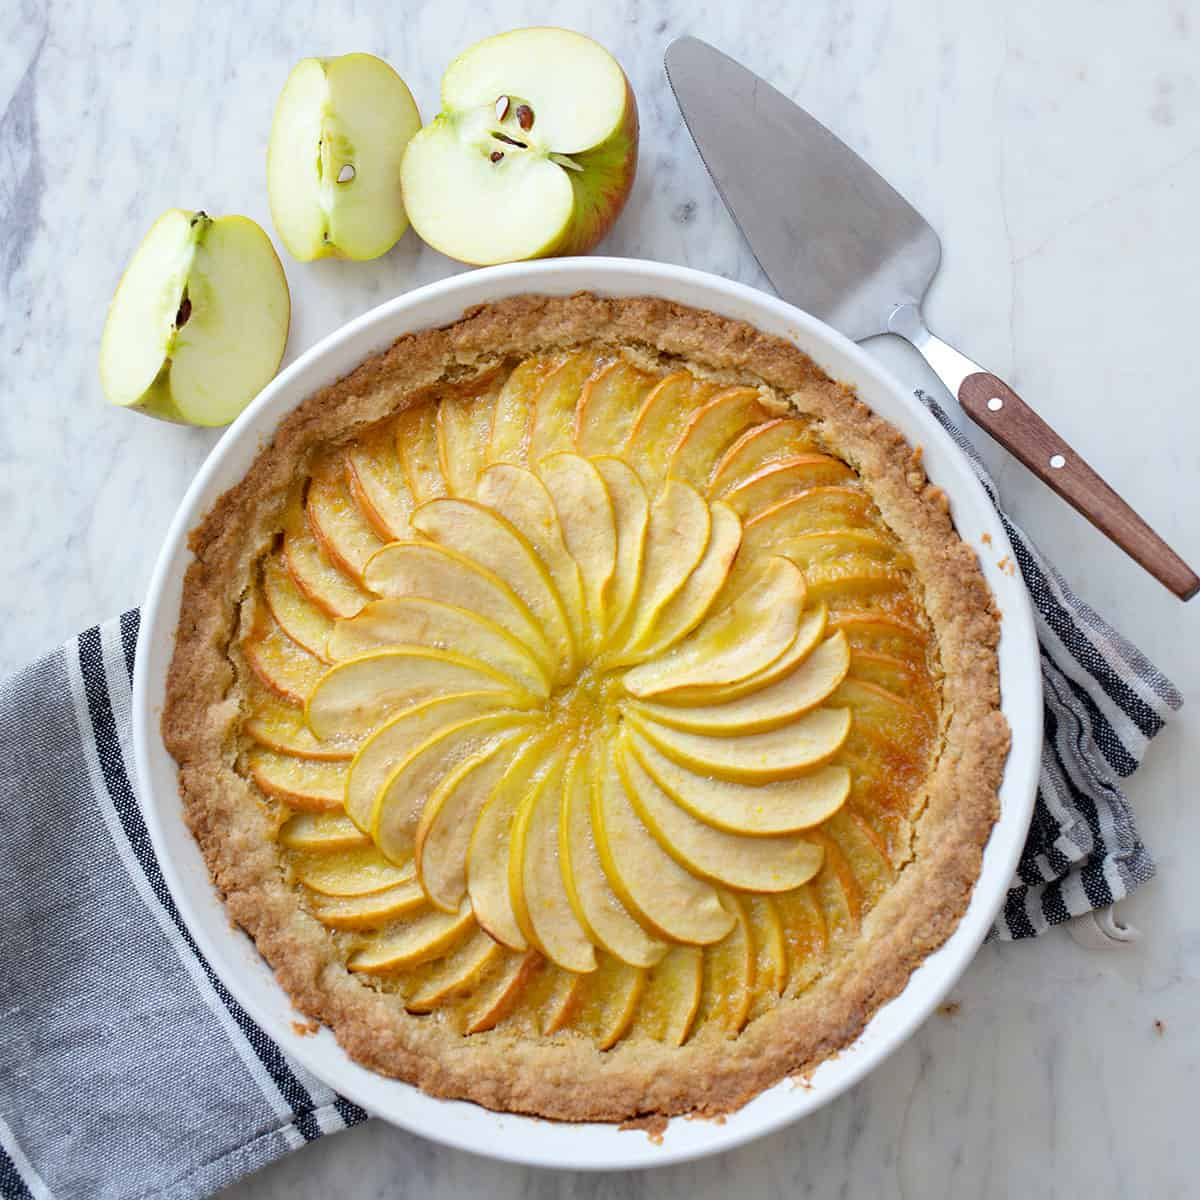

In [28]:
image

In [27]:
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.nn.functional.softmax(logits, dim= -1)
    top_prob, top_idx =  torch.max(probs,dim=-1)
    predicted_label =  model.config.id2label[top_idx.item()]
    confidence = top_prob.item()
    print(f'{predicted_label}, {confidence:.2f}')

apple_pie, 1.00
